In [55]:
import numpy as np

## Assumptions
1. 관측치들 간 독립성: 데이터의 샘플들은 랜덤하게 얻어져야 함. (반복적 측정 X, 시간 및 공간에 따른 상관관계 X)
  - 본 실습에서 활용하는 타이타닉 데이터의 경우 개별 승객 기록으로 구성되므로 자동 충족
2. 잔차 간 등분산성
3. 독립 변수와 log odds 간의 linearity (R에서는 car package에 [Box-Tidwell](https://towardsdatascience.com/assumptions-of-logistic-regression-clearly-explained-44d85a22b290) 수행하는 라이브러리 제공)
4. 이상치가 존재하지 않아야 함
- 추가적으로, 적당한 수의 샘플이 존재해야 함.
- 또한, independent variables가 너무 많을 경우 일반화 성능이 감소할 수 있음.
- 확인하는 방법에 대한 자세한 설명 [참고](https://towardsdatascience.com/assumptions-of-logistic-regression-clearly-explained-44d85a22b290)

- 다중 로지스틱 회귀모형의 일반적 형태
  - $\log(\frac{π(x)}{1-π(x)})=α+β_1x_1+\cdots+\beta_kx_k$
  - where $π(x)=P(Y=1|x), x=(x_1, \cdots, x_k)$
  - $π(x)$는 다음과 같이 재표현할 수 있음
    - $π(x)=\frac{exp(α+β_1x_1+\cdots+\beta_kx_k)}{1+exp(\alpha+\beta_1x_1+\cdots+\beta_kx_k)}=\frac{1}{1+exp\{-(\alpha+\beta_1x_1+\cdots+\beta_kx_k)\}}$
    - 따라서 sigmoid ($s(z)=\frac{1}{1+e^{-z}}$)와 동일한 형태 (더 자세한 설명 [참고](https://icim.nims.re.kr/post/easyMath/64))


> ## Sigmoid (Logit) Function
- predicted response variable은 0과 1 사이의 확률 값
  - 이 때 sigmoid function을 사용하면 실수 값을 0과 1 사이의 확률 값으로 표현됨

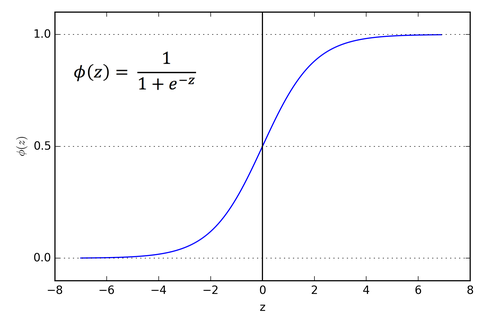

- sigmoid function을 통해 0과 1의 함수로 나타내기 위해 Decision Boundary (threshold)를 설정해줌
  - 해당 threshold를 넘을 경우 class 1, 그렇지 않은 경우 class 0으로 분류
- 예를 들어, threshold를 0.5로 설정하는 경우
  - if p ≥ 0.5, then class = 1
  - if p < 0.5, then class = 0

# Step 1. Data Preprocessing

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
data = pd.read_csv("https://raw.githubusercontent.com/shubham13p/Ad-Click-Prediction/master/advertising.csv")
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [108]:
dtdt = pd.read_csv("https://raw.githubusercontent.com/shubham13p/Ad-Click-Prediction/master/advertising.csv")

In [57]:
data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


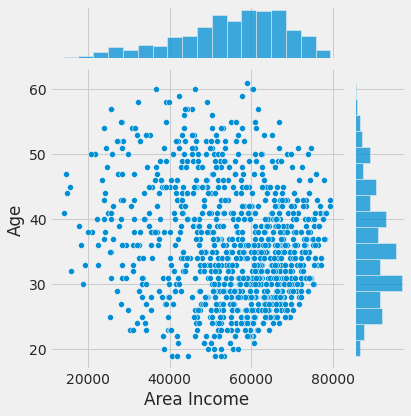

In [58]:
sns.jointplot(data["Area Income"], data.Age)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


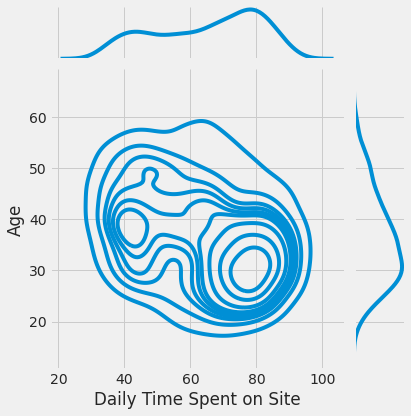

In [59]:
sns.jointplot(data["Daily Time Spent on Site"], data.Age, kind='kde')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


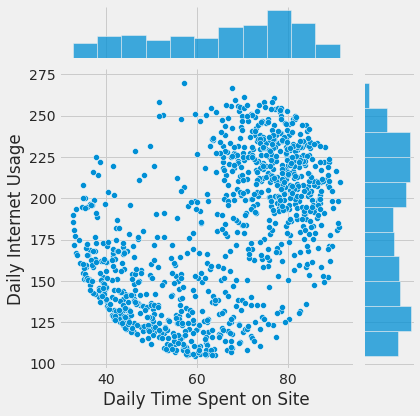

In [60]:
sns.jointplot(data["Daily Time Spent on Site"], data["Daily Internet Usage"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


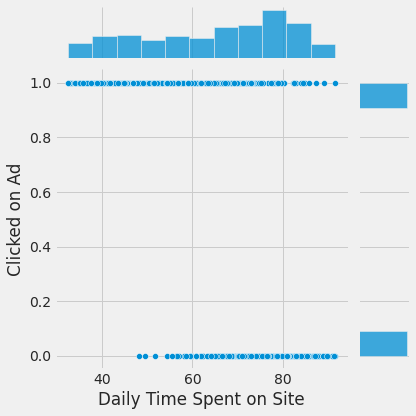

In [61]:
sns.jointplot(data["Daily Time Spent on Site"], data["Clicked on Ad"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


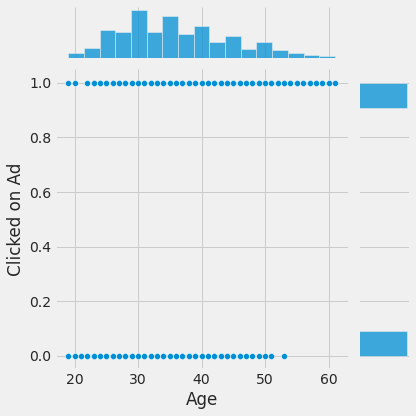

In [62]:
sns.jointplot(data["Age"], data["Clicked on Ad"])

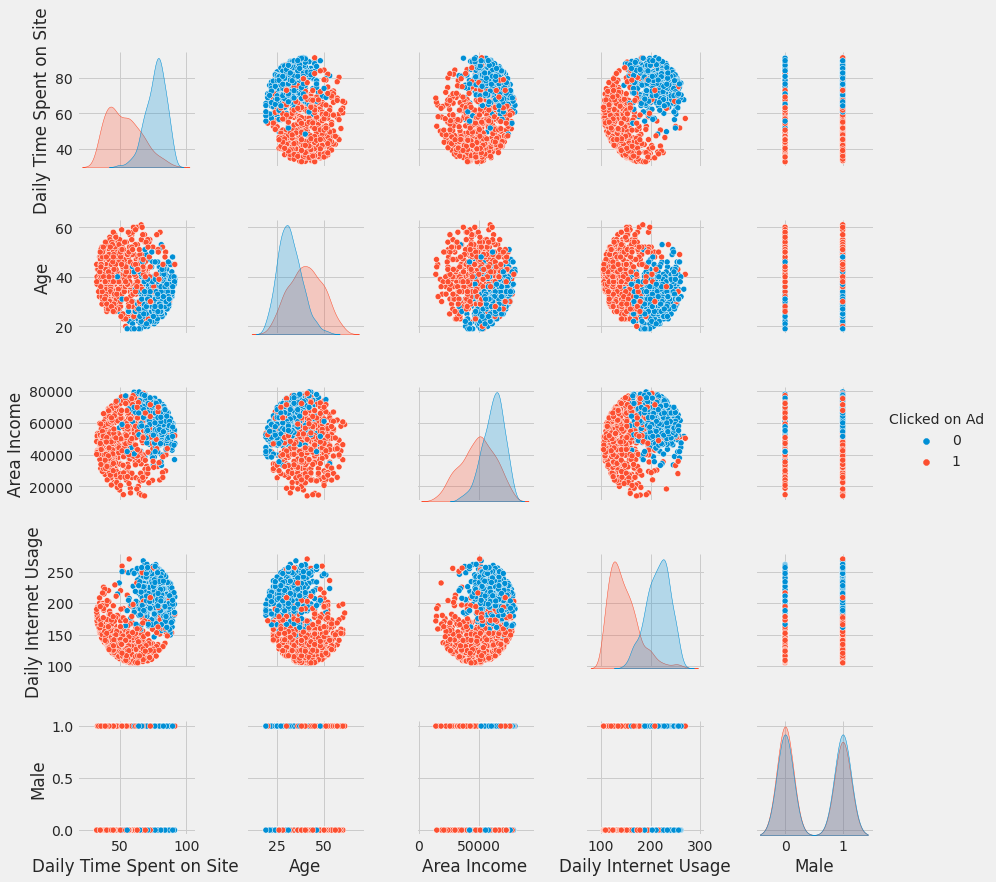

In [63]:
sns.pairplot(data, hue='Clicked on Ad')

- Area Income 4분위로 나눔

In [64]:
# data.info()
data['Area Income'].mean()
quantile_25 = np.percentile(data['Area Income'].values, 25)
quantile_50 = np.percentile(data['Area Income'].values, 50)
quantile_75 = np.percentile(data['Area Income'].values, 75)
quantile_100 = np.percentile(data['Area Income'].values, 100)
# outlier_idx =data['Daily Internet Usage'][ (data['Daily Internet Usage'] < quantile_25)]
data.loc[(data['Area Income'] <= quantile_25), 'Area Income'] = 1
data.loc[(data['Area Income'] > quantile_25) & (data['Area Income'] <= quantile_50 ), 'Area Income'] = 2
data.loc[(data['Area Income'] > quantile_50) & (data['Area Income'] <= quantile_75), 'Area Income'] = 3
data.loc[(data['Area Income'] > quantile_75)& (data['Area Income'] <= quantile_100), 'Area Income'] = 4 
data



,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,3.0,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,4.0,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,3.0,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,2.0,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,4.0,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,4.0,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,4.0,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,1.0,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,1.0,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


- Daily Time Spent on Site 4분위로 나눔 

In [65]:
data['Daily Time Spent on Site'].mean()
quantile_25 = np.percentile(data['Daily Time Spent on Site'].values, 25)
quantile_50 = np.percentile(data['Daily Time Spent on Site'].values, 50)
quantile_75 = np.percentile(data['Daily Time Spent on Site'].values, 75)
quantile_100 = np.percentile(data['Daily Time Spent on Site'].values, 100)

data.loc[(data['Daily Time Spent on Site'] <= quantile_25), 'Daily Time Spent on Site'] = 1
data.loc[(data['Daily Time Spent on Site'] > quantile_25) & (data['Daily Time Spent on Site'] <= quantile_50 ), 'Daily Time Spent on Site'] = 2
data.loc[(data['Daily Time Spent on Site'] > quantile_50) & (data['Daily Time Spent on Site'] <= quantile_75), 'Daily Time Spent on Site'] = 3
data.loc[(data['Daily Time Spent on Site'] > quantile_75)& (data['Daily Time Spent on Site'] <= quantile_100), 'Daily Time Spent on Site'] = 4 
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,3.0,35,3.0,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,4.0,31,4.0,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,3.0,26,3.0,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,3.0,29,2.0,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,3.0,35,4.0,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,3.0,30,4.0,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,1.0,45,4.0,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,2.0,51,1.0,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,2.0,19,1.0,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


- Daily Internet Usage 4분위로 나눔 

In [66]:
data['Daily Internet Usage'].mean()
quantile_25 = np.percentile(data['Daily Internet Usage'].values, 25)
quantile_50 = np.percentile(data['Daily Internet Usage'].values, 50)
quantile_75 = np.percentile(data['Daily Internet Usage'].values, 75)
quantile_100 = np.percentile(data['Daily Internet Usage'].values, 100)

data.loc[(data['Daily Internet Usage'] <= quantile_25), 'Daily Internet Usage'] = 1
data.loc[(data['Daily Internet Usage'] > quantile_25) & (data['Daily Internet Usage'] <= quantile_50 ), 'Daily Internet Usage'] = 2
data.loc[(data['Daily Internet Usage'] > quantile_50) & (data['Daily Internet Usage'] <= quantile_75), 'Daily Internet Usage'] = 3
data.loc[(data['Daily Internet Usage'] > quantile_75)& (data['Daily Internet Usage'] <= quantile_100), 'Daily Internet Usage'] = 4 
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,3.0,35,3.0,4.0,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,4.0,31,4.0,3.0,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,3.0,26,3.0,4.0,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,3.0,29,2.0,4.0,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,3.0,35,4.0,4.0,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,3.0,30,4.0,3.0,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,1.0,45,4.0,1.0,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,2.0,51,1.0,1.0,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,2.0,19,1.0,3.0,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


- Age 변수 범주화
  - ~20대, 30대, 40대, 50대 이상으로 구분

In [67]:
# data.describe()

data.loc[(data['Age'] >= 0) & (data['Age'] < 30), 'Age'] = 2 # 19~29세
data.loc[(data['Age'] >= 30) & (data['Age'] < 40), 'Age'] = 3 # 30대
data.loc[(data['Age'] >= 40) & (data['Age'] < 50), 'Age'] = 4 # 40대
data.loc[(data['Age'] >= 50), 'Age'] = 5 # 50대 이상
data['Age'] = data['Age'].apply(int)
data


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,3.0,3,3.0,4.0,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,4.0,3,4.0,3.0,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,3.0,2,3.0,4.0,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,3.0,2,2.0,4.0,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,3.0,3,4.0,4.0,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,3.0,3,4.0,3.0,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,1.0,4,4.0,1.0,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,2.0,5,1.0,1.0,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,2.0,2,1.0,3.0,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


3    411
2    264
4    233
5     92
Name: Age, dtype: int64

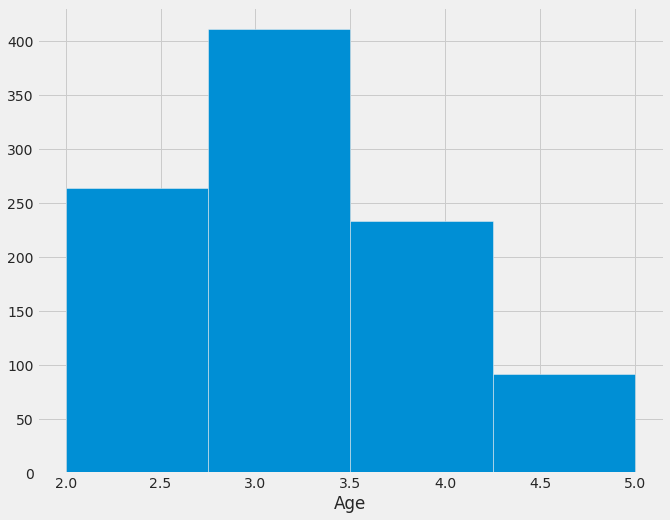

In [68]:
plt.figure(figsize=(10, 8))
data.Age.hist(bins=data.Age.nunique())
plt.xlabel('Age')
data["Age"].value_counts()

- 불필요한 컬럼 제거 -> 'Ad Topic Line','City','Country','Timestamp' -> 실수형 데이터가 아니고 종류가 매우 많아 나누기 애매모호하여 제거한다  


In [69]:
data.drop(columns=['Ad Topic Line','City','Country','Timestamp']) 

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,3.0,3,3.0,4.0,0,0
1,4.0,3,4.0,3.0,1,0
2,3.0,2,3.0,4.0,0,0
3,3.0,2,2.0,4.0,1,0
4,3.0,3,4.0,4.0,0,0
...,...,...,...,...,...,...
995,3.0,3,4.0,3.0,1,1
996,1.0,4,4.0,1.0,1,1
997,2.0,5,1.0,1.0,1,1
998,2.0,2,1.0,3.0,0,0


# Step 2. EDA

In [70]:
# 특정 feature에 따른 광고 클릭 유무 비교 (0: 클릭 X , 1: 클릭 o) 함수
def bar_chart(feature):
    click = data[data['Clicked on Ad']==1][feature].value_counts()
    no_click = data[data['Clicked on Ad']==0][feature].value_counts()
    df_survived = pd.DataFrame([click,no_click])
    df_survived.index = ['Clicked on Ad','Did not Click on Ad']
    df_survived.plot(kind='bar',stacked=True, figsize=(10,5))

Age
2    0.246212
3    0.411192
4    0.763948
5    0.956522
Name: Clicked on Ad, dtype: float64

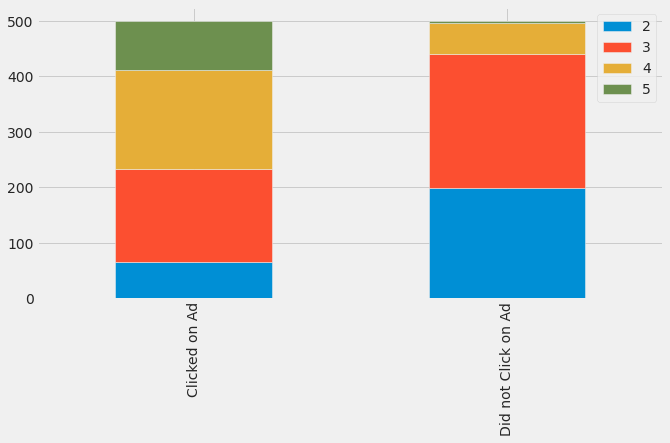

In [71]:
# Age에 따른 광고 클릭 차이
bar_chart('Age') # 30,40 대가 광고 클릭수가 가장 많다  ( 2: 19~29세 , 3: 30대, 4:40대, 5:50대 이상 )
data.groupby(['Age'])['Clicked on Ad'].agg(lambda x: x.sum()/x.count()) # 50대 이상이 광고 클릭확률이 95%다 -> 나이가 많아 질수록 광고 클릭 학률이 높아지는데 컴퓨터 조작에 익숙하지 않아서일 듯 하다

Area Income
1.0    0.856
2.0    0.560
3.0    0.312
4.0    0.272
Name: Clicked on Ad, dtype: float64

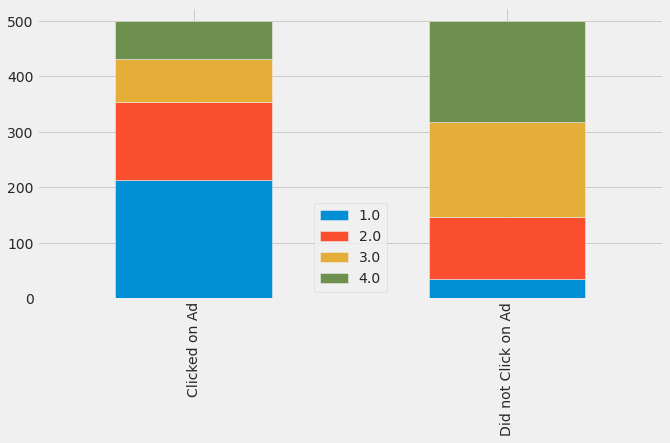

In [72]:
# area income에 따른 광고 클릭 차이
bar_chart('Area Income') # 소득순위가 높을 수록 광고 클릭 수가 낮다  (소득수준 1: 하위 25% , 2: 하위 25%~50%, 3:상위 50%~75%, 4: 상위 75%~100%)
data.groupby(['Area Income'])['Clicked on Ad'].agg(lambda x: x.sum()/x.count()) # 소득수준이 낮을 수록 광고 클릭 확률이 높다 -> maybe 구인구직 or 도박사이트 or 한가해서 ? 

Daily Time Spent on Site
1.0    0.992
2.0    0.744
3.0    0.180
4.0    0.084
Name: Clicked on Ad, dtype: float64

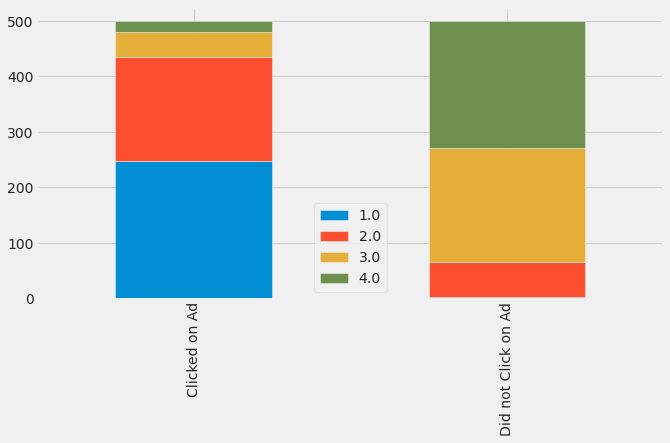

In [73]:
# Daily Time Spent On Site에 따른 광고 클릭 차이
bar_chart('Daily Time Spent on Site') # 특정 사이트에 적은 시간을 머무르는 사람일 수록 광고를 많이 클릭함 -> 원하는 정보를 얻으려 했지만 실수로 광고를 잘 못 누르고 사이트를 나가는 사람들일 듯 하다. 
data.groupby(['Daily Time Spent on Site'])['Clicked on Ad'].agg(lambda x: x.sum()/x.count()) # 마찬가지로 특정 사이트에 적은 시간을 머무르는 사람일수록 광고 클릭 확률이 점점 높아진다. 
                                                                                             # 정리하자면 사이트에 정보를 얻으로 온 사람이 실수로 광고를 잘못 클릭하고 원하는 정보를 얻는데 방해를 받아 그 사이트를 나간것이라 볼 수 있다.

Daily Internet Usage
1.0    1.000
2.0    0.792
3.0    0.148
4.0    0.060
Name: Clicked on Ad, dtype: float64

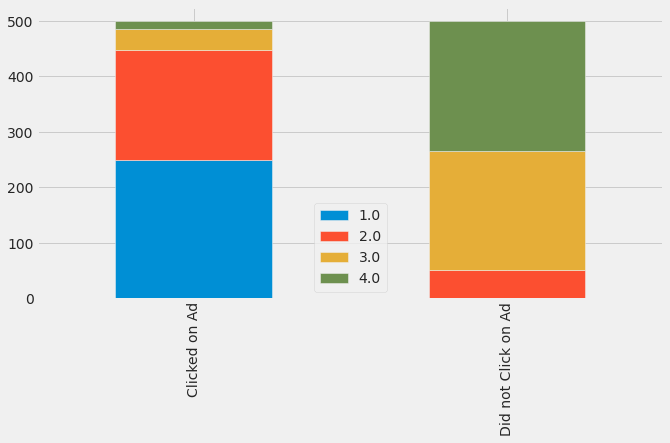

In [74]:
# Daily Internet Usage  -> Daily Time Spent on Site 와 굉장히 유사 -> 하루 인터넷 사용량이 많은수록 컴퓨터 조작에 익숙하여 광고를 피해가는 법을 잘 안다. 이로 인해 원하는 정보만을 잘 얻어가고 광고를 누르지 않기에 방해를 받는 일이 없어 사이트에 오래 머무를 확률이 높다
bar_chart('Daily Internet Usage') # 하루 인터넷 사용량이 적은 사람일 수록 광고를 많이 클릭함 -> 컴퓨터 조작 혹은 인터넷 사용에 익숙하지 않아 실수로 잘못 누르는 듯 하다. 
data.groupby(['Daily Internet Usage'])['Clicked on Ad'].agg(lambda x: x.sum()/x.count()) # 마찬가지로 하루 인터넷 사용량이 적은 사람일수록 광고를 누를 확률이 높고 인터넷 사용량이 많은 사람일수록 광고를 잘 누르지 않는다. 컴퓨터 사용에 익숙할 수록 광고를 잘 피해가는 법을 안다는점을 시사한다. 

Male
0    0.518304
1    0.480249
Name: Clicked on Ad, dtype: float64

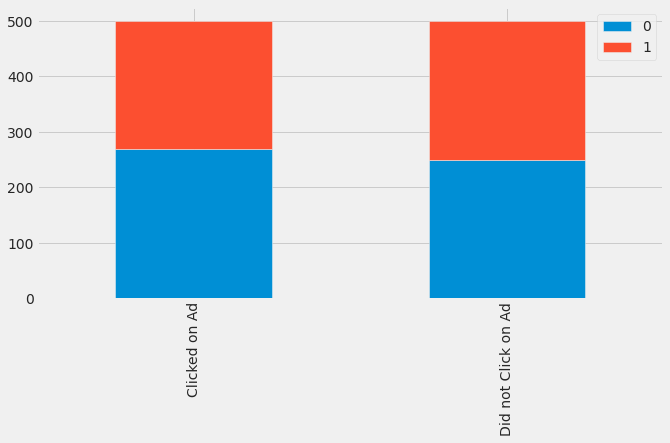

In [75]:
# 성별에 따른 광고 클릭 차이
bar_chart('Male') # 광고 클릭수와 성별은 크게 연관 없음
data.groupby(['Male'])['Clicked on Ad'].agg(lambda x: x.sum()/x.count()) # 광고 클릭확률과 성별은 크게 연관이 없음

In [76]:
# passenger = pd.get_dummies(passenger, columns = ['Sex', 'Pclass'], drop_first=True) # 두 변수 간 correaltion =1이 되는 것을 방지

In [77]:
# 유의미하다고 생각되는 column 선택. 광고 클릭 유무 column을 제외한 2개 column 선택 (x = 'Daily Time Spent on Site','Area Income' y = 광고 클릭 여부)   
data2 = data[['Daily Time Spent on Site','Area Income','Clicked on Ad']] #Daily Internet Usage를 뺀 이유는 Daily Time Spent on Site랑 bar chart 상 유사도가 높아 다중공선성을 줄이기 위함이다(이유는 bar chart 주석에 달아놓았습니다)
                                                                        #또한 AGE를 변수로 추가할 시 VGF 값이 많이 커지기 때문에 Age를 변수에서 빼주었다.

In [78]:
data2 = pd.get_dummies(data2, columns = ['Area Income'], drop_first=True)

In [79]:
data3 = data[['Age','Area Income','Clicked on Ad']]
data3 = pd.get_dummies(data3, columns = ['Area Income'], drop_first=True)

- 다중공선성 확인
  - 5를 초과하는 값이 없으므로 문제 없음

In [80]:
# Use variance inflation factor to identify any significant multi-collinearity
def calc_vif(df):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)

In [81]:
calc_vif(data2) # Data2를 대상으로 REgression 진행할 것임

,variables,VIF
0,Daily Time Spent on Site,3.630159
1,Clicked on Ad,1.333221
2,Area Income_2.0,1.847916
3,Area Income_3.0,2.023307
4,Area Income_4.0,1.902825


In [82]:
calc_vif(data3) #AGe 넣으면 다중공선성이 높은 것을 확인하기 위해 data3을 만들어서 돌려본 것입니당

,variables,VIF
0,Age,6.526424
1,Clicked on Ad,3.118282
2,Area Income_2.0,1.629452
3,Area Income_3.0,1.782993
4,Area Income_4.0,1.953358


# Step 3. Logistic Regression 
- 설명이 용이함
  - 오즈(odds; $\frac{p}{1-p}$)의 관점에서 해석될 수 있음 (실패에 비해 성공할 확률의 비)
  - $exp(\beta_1)$: 나머지 변수$(x_2,\cdots,x_k)$가 주어질 때 $x_1$이 한 단위 증가할 때마다 성공(Y)의 오즈가 몇 배 증가하는지를 나타내는 값
- 좋은 성능을 기대하기 어려울 수도 있음
- `statsmodel`, `sklearn`
  - `statsmodel`: p-value 등 모델에 대한 summary 정보 제공

In [83]:
train_features = data2[['Daily Time Spent on Site','Area Income_2.0','Area Income_3.0','Area Income_4.0']]
train_target = data2['Clicked on Ad']
train_target = train_target.astype('int')

In [84]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_features, train_target, test_size = 0.2, random_state = 312)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2, random_state = 312, stratify=y_train)
print("train set:",x_train.shape)
print("valid set:",x_valid.shape)
print("test set:",x_test.shape)

train set: (640, 4)
valid set: (160, 4)
test set: (200, 4)


In [85]:
y_train.value_counts() # 0: 사망, 1: 생존

0    322
1    318
Name: Clicked on Ad, dtype: int64

In [86]:
from imblearn.under_sampling import RandomUnderSampler
x_train, y_train = RandomUnderSampler(random_state=312, sampling_strategy='majority').fit_resample(x_train, y_train)

In [87]:
y_train.value_counts() 

0    318
1    318
Name: Clicked on Ad, dtype: int64

In [88]:
import statsmodels.api as sm
x_train = sm.add_constant(x_train)
x_valid = sm.add_constant(x_valid)
x_test = sm.add_constant(x_test)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [89]:
model_sm = sm.Logit(y_train, x_train).fit()
# model_sm = smf.logit("y 변수명 ~ X변수1 + X변수2", data=데이터프레임).fit()의 형태로도 fit 가능

Optimization terminated successfully.
         Current function value: 0.267339
         Iterations 8


# Step 4. Evaluation

In [90]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [91]:
# Probability 값
predict_prob = model_sm.predict(x_valid)

In [92]:
y_valid.shape

(160,)

- 예측값(fitted)과 잔차(residual)를 비교
- 빨간 실선은 잔차의 추세를 나타냄
- 모든 예측값에서 가운데 점선에 맞추어 잔차가 비슷하게 있어야 하며, 빨간 실선이 점선에서 크게 벗어난다면 예측값에 따라 잔차가 크게 달라짐 = 선형성이 없음

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


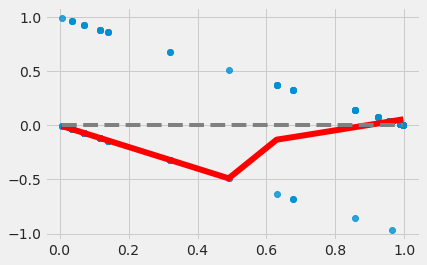

In [93]:
residual = y_valid - predict_prob

sns.regplot(predict_prob, residual, lowess=True, line_kws={'color': 'red'})
plt.plot([predict_prob.min(), predict_prob.max()], [0, 0], '--', color='grey')

- logit linearity 확인

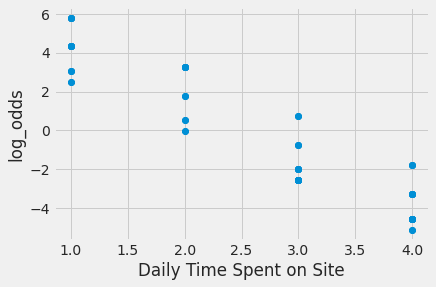

In [94]:
import numpy as np
# Getting log odds values
log_odds = np.log(predict_prob / (1 - predict_prob))

# Visualize predictor variable vs logit values for Age
plt.scatter(x=x_valid['Daily Time Spent on Site'].values, y=log_odds)
plt.xlabel("Daily Time Spent on Site")
plt.ylabel("log_odds")
plt.show()

- 해당 실습에서는 비선형 패턴을 보여주므로 로짓 선형성 가정이 위반됨 (polynomial terms 등 고차 다항식 항을 통합하여 변환을 수행할 수 있음. [참고](https://towardsdatascience.com/assumptions-of-logistic-regression-clearly-explained-44d85a22b290))

- cut-off 설정

In [95]:
# 경계값cut off value에 따라 0,1 값 변환
def change_cutoff(pred_prob_y, cutoff):
    Y_change = pred_prob_y.copy()
    Y_change[Y_change > cutoff] = 1
    Y_change[Y_change <= cutoff] = 0
    return(Y_change.astype(int))

In [96]:
for i in range(1,10):
  print(confusion_matrix(y_valid, change_cutoff(predict_prob, i*0.1)))
  print(" Accuracy:", accuracy_score(y_valid, change_cutoff(predict_prob, i*0.1)))
  print("Precision:", precision_score(y_valid, change_cutoff(predict_prob, i*0.1)))
  print("   Recall:", recall_score(y_valid, change_cutoff(predict_prob, i*0.1)))
  print(" F1 score:", f1_score(y_valid, change_cutoff(predict_prob, i*0.1)))

[[53 27]
 [ 7 73]]
 Accuracy: 0.7875
Precision: 0.73
   Recall: 0.9125
 F1 score: 0.811111111111111
[[67 13]
 [14 66]]
 Accuracy: 0.83125
Precision: 0.8354430379746836
   Recall: 0.825
 F1 score: 0.8301886792452831
[[67 13]
 [14 66]]
 Accuracy: 0.83125
Precision: 0.8354430379746836
   Recall: 0.825
 F1 score: 0.8301886792452831
[[72  8]
 [16 64]]
 Accuracy: 0.85
Precision: 0.8888888888888888
   Recall: 0.8
 F1 score: 0.8421052631578948
[[75  5]
 [17 63]]
 Accuracy: 0.8625
Precision: 0.9264705882352942
   Recall: 0.7875
 F1 score: 0.8513513513513514
[[75  5]
 [17 63]]
 Accuracy: 0.8625
Precision: 0.9264705882352942
   Recall: 0.7875
 F1 score: 0.8513513513513514
[[78  2]
 [25 55]]
 Accuracy: 0.83125
Precision: 0.9649122807017544
   Recall: 0.6875
 F1 score: 0.8029197080291971
[[78  2]
 [25 55]]
 Accuracy: 0.83125
Precision: 0.9649122807017544
   Recall: 0.6875
 F1 score: 0.8029197080291971
[[79  1]
 [30 50]]
 Accuracy: 0.80625
Precision: 0.9803921568627451
   Recall: 0.625
 F1 score: 0.

- ROC curve: 다양한 threshold에 대한 이진분류기의 성능을 한번에 표시한 그래프
  - TPR: true positive rate
  - FPR: false positive rate
  - 좌측 상단으로 붙어있는 경우 좋은 분류기
- [참고](https://angeloyeo.github.io/2020/08/05/ROC.html)

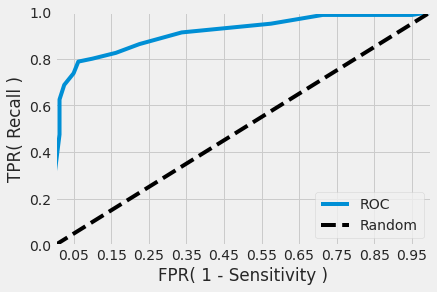

In [97]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , pred_proba_c1):
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1) # 임곗값에 따른 FPR, TPR 값을 반환 받음. 

    plt.plot(fprs , tprs, label='ROC')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
  
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
  
roc_curve_plot(y_valid, predict_prob)

# Step 5. Interpretation
- [Deviance](http://contents2.kocw.or.kr/KOCW/document/2017/chungbuk/najonghwa/5.pdf)
  - saturated model: 연구모형이 해당 데이터에 대해 완전히 적합된 모형으로, 추정해야할 모수가 전체 변수의 수와 동일
  - null model: 절편항만 가지고 X 변수 어떤것도 모델에 반영되지 않는 경우(Y=b_0)로, 추정할 모수가 1개
  - fitted model: p개의 모수+절편항을 포함하는 모형이므로 추정할 모수가 p+1개
  - **residual deviance**: 2{LL(saturated model) - LL(fitted model)}, df=n-(p+1)
  - **null deviance**: 2{LL(saturated model) - LL(null model)}, df=n-1
  - 두 deviance는 값이 작을수록 해당 모형이 자료를 잘 적합함을 의미
  - 영모형과 제안모형 간의 비교(검정)는 (Null Deviance - Proposed Deviance)가 근사적으로 자유도가 (n-(p+1))-(n-1)=p인 카이제곱분포를 따른다는 사실에 기초
  - 이는 [`glm()`](https://www.statsmodels.org/dev/generated/statsmodels.genmod.generalized_linear_model.GLM.html)에서 활용 가능

In [98]:
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Clicked on Ad   No. Observations:                  636
Model:                          Logit   Df Residuals:                      631
Method:                           MLE   Df Model:                            4
Date:                Sat, 30 Apr 2022   Pseudo R-squ.:                  0.6143
Time:                        06:50:04   Log-Likelihood:                -170.03
converged:                       True   LL-Null:                       -440.84
Covariance Type:            nonrobust   LLR p-value:                6.624e-116
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        8.3530      0.701     11.908      0.000       6.978       9.728
Daily Time Spent on Site    -2.5392      0.206    -12.318      0.000      -2.943      -2.135
Area Income_2.0             -1.4833      0.449     -3.307      0.001      -2.362      -0.604
Area Income_3.0             -2.7439      0.459     -5.977      0.000      -3.644      -1.844
Area Income_4.0             -3.3131      0.449     -7.375      0.000      -4.194      -2.433
============================================================================================
"""

In [99]:
model_sm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
=========================================================================
Model:                 Logit              Pseudo R-squared:   0.614      
Dependent Variable:    Clicked on Ad      AIC:                350.0547   
Date:                  2022-04-30 06:50   BIC:                372.3307   
No. Observations:      636                Log-Likelihood:     -170.03    
Df Model:              4                  LL-Null:            -440.84    
Df Residuals:          631                LLR p-value:        6.6242e-116
Converged:             1.0000             Scale:              1.0000     
No. Iterations:        8.0000                                            
-------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
const                     8.3530   0.7015  11.9076 0.0000  6.9781  9.7279
Daily Time Spent on Site -2.5392   0.2061 -12.3181 0.0000 -2.9432 -2.1352
Area Income_2.0          -1.4833   0.4486  -3.3069 0.0009 -2.3625 -0.6042
Area Income_3.0          -2.7439   0.4591  -5.9765 0.0000 -3.6438 -1.8441
Area Income_4.0          -3.3131   0.4493  -7.3745 0.0000 -4.1937 -2.4326
=========================================================================

"""

- reference: (Area Income_1.0 = 1)
- Logit(Click = 1) = 8.3530 - 2.5392 \* Daily Time Spent on Site - 1.4833 \*Area Income_2.0 - 2.7439 \*Area Income_3.0 - 3.3131 \*Area Income_2.0
- p-value가 유의수준 0.05 이하인 변수: Area Income_2.0, Area Income_3.0, Area Income_4.0, Daily Time Spent on Site

In [100]:
# Odds ratio
import numpy as np
np.exp(model_sm.params) # reference: (Area Income_1.0 = 1)

const                       4242.916128
Daily Time Spent on Site       0.078927
Area Income_2.0                0.226879
Area Income_3.0                0.064319
Area Income_4.0                0.036402
dtype: float64

Area Income_1.0에 속한 사람들은 Area Income_4.0에 속한 사람들보다 odds가 27.471배 증가한다. 즉 수입이 적은 사람들이 광고를 클릭할 우도가 훨씬 큰 것이다.